In [1]:
from selenium import webdriver
from pyvirtualdisplay import Display
from bs4 import BeautifulSoup as BS
from PIL import Image
import io
import os
import base64

In [5]:
#! wget https://github.com/mozilla/geckodriver/releases/download/v0.12.0/geckodriver-v0.12.0-linux64.tar.gz
#! tar -xvf geckodriver-v0.12.0-linux64.tar.gz

In [2]:
display = Display(visible=0, size=(1024, 768))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1023'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1023'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [6]:
driver = webdriver.Firefox(executable_path=os.getcwd()+'/geckodriver')

In [44]:
home_page = 'http://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do'
driver.get(home_page)

In [45]:
driver.find_element_by_xpath('//input[@name="selCmpyType"][@value="1"]').click()

In [47]:
driver.find_element_by_xpath('//input[@name="selQueryType"][@value="3"]').click()

In [48]:
driver.find_element_by_name('queryStr').send_keys('微星')

In [49]:
capt_b64 = driver.find_element_by_id('kaptcha').screenshot_as_base64

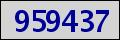

In [50]:
Image.open(io.BytesIO(base64.b64decode(capt_b64)))

In [13]:
img_code = '452386'
driver.find_element_by_name('imageCode').send_keys(img_code)

In [15]:
driver.find_element_by_name('submitData').click()

In [43]:
driver.save_screenshot('quicklook.jpg')

True